In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model,load_model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.layers import LeakyReLU,ELU,ReLU
from matplotlib import pyplot as plt # 학습과정 시각화
# scale조정, train_test_split 등을 추가

In [5]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',',skiprows=1)
data.shape

(100, 785)

In [10]:
print('타겟 : ', data[1,0])
# print('이미지(784pixel = 28*28) :',data[1,1:]).reshape(28,28)
image = data[1,1:].reshape(28,28)
image.shape

타겟 :  0.0


(28, 28)

In [11]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel),end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0 

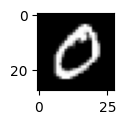

In [14]:
plt.figure(figsize=(1,1))
plt.imshow(image,cmap='gray')

In [ ]:
# 칼라사진 - > 흑백모드로 넘파이 배열로 읽기


In [15]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   --- ------------------------------------ 3.1/38.1 MB 18.5 MB/s eta 0:00:02
   ----------- ---------------------------- 10.5/38.1 MB 28.5 MB/s eta 0:00:01
   -------------------- ------------------- 19.7/38.1 MB 33.6 MB/s eta 0:00:01
   --------------------------------- ------ 32.0/38.1 MB 39.8 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 37.8 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import cv2
# 사진이미지를 흑백포맷으로 넘파이배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg',cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

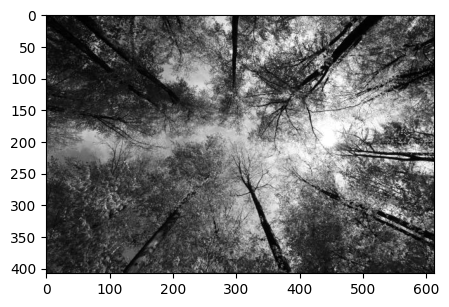

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray,cmap='gray')

# 1. 데이터 생성 및 전처리

In [20]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [28]:
print(y_test[1])
# plt.imshow(X_test[1],cmap='gray')
# plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel),end='')
    print()

2
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0

In [29]:
# Train데이터 6만개 => Train(5만개) + val(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [31]:
print('학습셋 : ',X_train.shape,y_train.shape)
print('검증셋 :', X_val.shape,y_val.shape)
print('시험셋 :', X_test.shape,y_test.shape)

학습셋 :  (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [35]:
# 입력(독립) 변수 (n,28,28) => (n,28*28) => 실수형변환 -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000,28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1,784).astype('float32')/255.0
test_X  = X_test.reshape(10000,-1).astype('float32')/255.0
train_X.shape,val_X.shape,test_X.shape,

((50000, 784), (10000, 784), (10000, 784))

In [40]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train,10)  # 10: 카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_Y.shape,val_Y.shape,test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [44]:
# Train 5만 -> 700개, Val 만개 -> 300개 (목적: 수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000,700) # 0~50000 미만의 수 700개 비복원 추출
val_idx   = np.random.choice(10000,300) # 0~10000 미만의 수 300개 비복원 추출
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

In [48]:
train_X.shape,train_Y.shape,val_X.shape,val_Y.shape,test_X.shape,test_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10), (10000, 784), (10000, 10))

# 2. 모델 구성

In [49]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2
                #,activation='leakyelu' # activation='leakyelu' 그대로 못씀
                ))
# model.ad(Relu())  ==  model.add(Dense(units=2),activation='Relu')
model.add(LeakyReLU(alpha=0.01))   # alpha=0.01: 음수결과에 대해 1%만 통과 (0.3이 기본) / LeakyReLU는 한 layer 더 만듦
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [50]:
model.compile(loss ='categorical_crossentropy',   # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy']) # 평가지표

# 4. 모델 학습

In [51]:
%%time
hist = model.fit(train_X,train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X,val_Y),
                verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 34ms/step - loss: 2.2600 - accuracy: 0.1271 - val_loss: 2.2430 - val_accuracy: 0.1500
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2218 - accuracy: 0.1471 - val_loss: 2.2035 - val_accuracy: 0.1667
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1856 - accuracy: 0.1543 - val_loss: 2.1709 - val_accuracy: 0.1567
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1556 - accuracy: 0.1586 - val_loss: 2.1409 - val_accuracy: 0.1533
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1294 - accuracy: 0.1557 - val_loss: 2.1149 - val_accuracy: 0.1600
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1057 - accuracy: 0.1571 - val_loss: 2.0924 - val_accuracy: 0.1833
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.0855 - accuracy: 0.1700 - val_loss: 2.0715 - val_accuracy: 0.1800
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.3388 - accuracy: 0.5471 - val_loss: 1.4713 - val_accuracy: 0.4933
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3356 - accuracy: 0.5486 - val_loss: 1.4716 - val_accuracy: 0.4867
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3331 - accuracy: 0.5529 - val_loss: 1.4686 - val_accuracy: 0.4867
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 1.3297 - accuracy: 0.5543 - val_loss: 1.4688 - val_accuracy: 0.4900
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 1.3264 - accuracy: 0.5529 - val_loss: 1.4660 - val_accuracy: 0.4867
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3235 - accuracy: 0.5543 - val_loss: 1.4663 - val_accuracy: 0.4900
Epoch 123/200
7/7 [==============================] - 0s 6ms/step - loss: 1.3206 - accuracy: 0.5571 - val_loss: 1.4651 - val_accuracy: 0.4933
Epoch 124/200
7/7 [========

# 5. 모델 평가하기

In [52]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

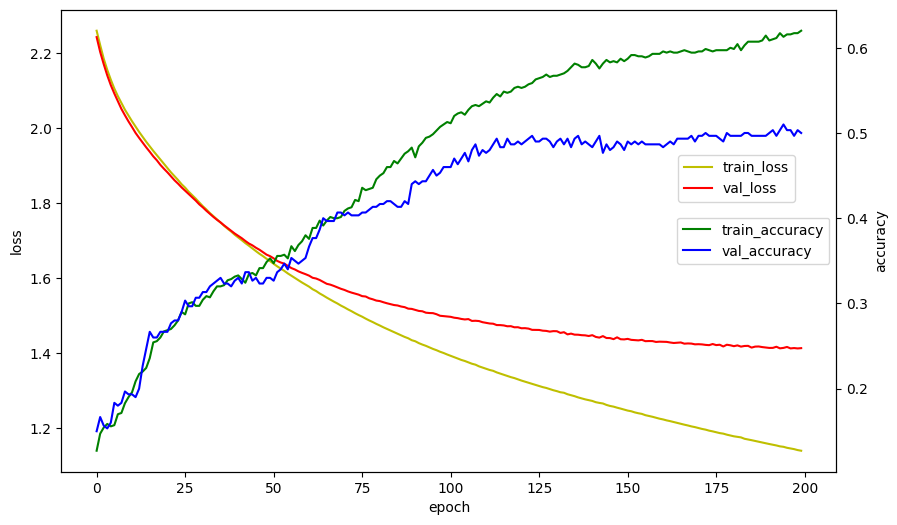

In [53]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [54]:
# 모델평가(테스트셋)
loss_metrics = model.evaluate(test_X,test_Y,batch_size=100,verbose=1)
print('loss : ',loss_metrics[0] )
print('accuracy : ',loss_metrics[1] )

100/100 [==============================] - 0s 1ms/step - loss: 1.5867 - accuracy: 0.4592
loss :  1.5867257118225098
accuracy :  0.459199994802475


# <font color='red' >👍※</font> 위 모델(DNN)의 <font color='red' >accuracy 늘리기</font>

##   위 모델(DNN)의 accuracy 늘리기

- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data 추가, 활성화 함수 relu계열, tanh,dropout)
- epoch 조정
- optimizer 변경

In [60]:
%%time
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n,28,28) => (n,28*28) => 실수형변환 -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000,28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1,784).astype('float32')/255.0
test_X  = X_test.reshape(10000,-1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])

# to_categorical(y_train)[0]
train_Y = to_categorical(y_train,10)  # 10: 카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y = to_categorical(y_test)
# Train 5만 -> 700개, Val 만개 -> 300개 (목적: 수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000,700) # 0~50000 미만의 수 700개 비복원 추출
# val_idx   = np.random.choice(10000,300) # 0~10000 미만의 수 300개 비복원 추출
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024,activation='relu'
                #,activation='leakyelu' # activation='leakyelu' 그대로 못씀
                ))
model.add(Dropout(0.3))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.3))
# model.ad(Relu())  ==  model.add(Dense(units=2),activation='Relu')
model.add(LeakyReLU(alpha=0.01))   # alpha=0.01: 음수결과에 대해 1%만 통과 (0.3이 기본) / LeakyReLU는 한 layer 더 만듦
model.add(Dense(units=10,activation='softmax'))
model.summary()
# 컴파일
model.compile(loss ='categorical_crossentropy',   # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy']) # 평가지표

hist = model.fit(train_X,train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X,val_Y),
                verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               524800    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 256)              

500/500 [==============================] - 5s 10ms/step - loss: 0.0129 - accuracy: 0.9974 - val_loss: 0.1635 - val_accuracy: 0.9835
Epoch 104/200
500/500 [==============================] - 5s 11ms/step - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.1665 - val_accuracy: 0.9848
Epoch 105/200
500/500 [==============================] - 5s 11ms/step - loss: 0.0136 - accuracy: 0.9973 - val_loss: 0.1534 - val_accuracy: 0.9838
Epoch 106/200
500/500 [==============================] - 5s 10ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.1628 - val_accuracy: 0.9829
Epoch 107/200
500/500 [==============================] - 5s 10ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.1597 - val_accuracy: 0.9843
Epoch 108/200
500/500 [==============================] - 5s 10ms/step - loss: 0.0122 - accuracy: 0.9973 - val_loss: 0.1587 - val_accuracy: 0.9829
Epoch 109/200
500/500 [==============================] - 5s 11ms/step - loss: 0.0167 - accuracy: 0.9967 - val_loss: 0.1763 - val_accuracy:

## 모델 평가

In [ ]:
hist.history.keys()

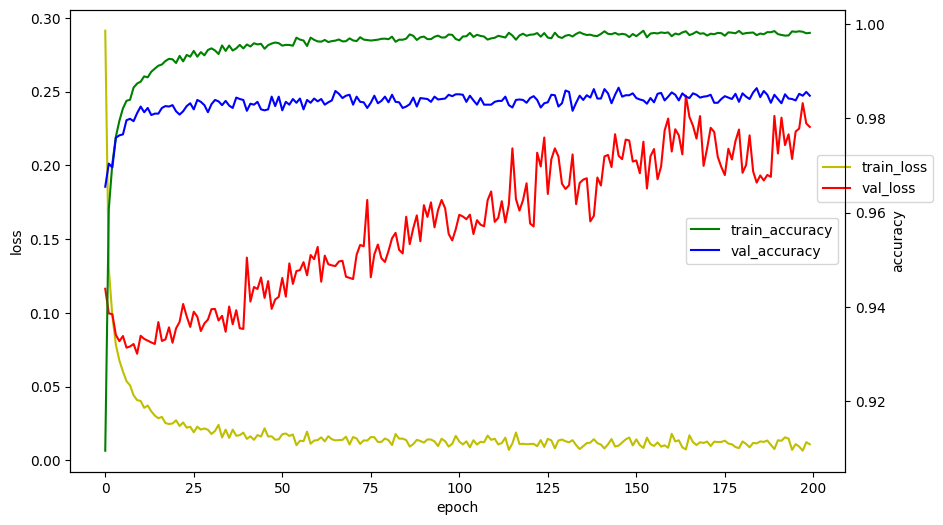

In [61]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [62]:
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.9870


[0.23993676900863647, 0.9869999885559082]

In [83]:
# 모델 평가
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.9870


0.9869999885559082

In [67]:
# 교차표
np.all(test_Y.argmax(axis=1)  == y_test)  # 실제값

True

In [65]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [74]:
# model.predict(test_X).argmax(axis=1)    # 예측값
y_hat = np.argmax(model.predict(test_X),axis=1)

313/313 [==============================] - 1s 3ms/step


In [79]:
pd.crosstab(y_test,y_hat,rownames=['실제값'],colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,974,1,0,1,0,1,1,1,1,0
1,0,1128,1,1,0,0,2,1,2,0
2,3,0,1014,1,1,0,0,8,5,0
3,0,0,2,1000,0,2,0,2,2,2
4,2,1,1,0,967,0,4,1,0,6
5,2,0,0,11,0,868,6,2,3,0
6,3,2,0,0,1,1,948,0,3,0
7,1,0,6,1,1,0,0,1013,2,4
8,0,0,1,1,0,0,0,2,967,3


In [84]:
# 틀린갯수
10000 - 10000*score[1]

130.00011444091797

# ※콜백함수1: 로그출력

In [85]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [89]:
%%time

# 특정 에포크마다 로그출력하도록 제한
class Customhistory(Callback):
    def __init__(self):   #생성자 함수
        self.epoch = 0
    def on_epoch_end(self,batch,logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch: {},loss: {:.4f},acc: {:.4f},val_loss: {:.4f},val_acc:{:.4f}'
                  .format(self.epoch,
                          logs.get('loss'),
                          logs.get('accuracy','-'),
                          logs.get('val_loss','-'),
                          logs.get('val_accuracy','-')
            ))
customHistory = Customhistory()

(X_train,y_train),(X_test,y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(1만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립) 변수 (n,28,28) => (n,28*28) => 실수형변환 -> 스케일 조정(/255.0)
train_X = X_train.reshape(50000,28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1,784).astype('float32')/255.0
test_X  = X_test.reshape(10000,-1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])

# to_categorical(y_train)[0]
train_Y = to_categorical(y_train,10)  # 10: 카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y = to_categorical(y_test)

# Train 5만 -> 700개, Val 만개 -> 300개 (목적: 수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000,700) # 0~50000 미만의 수 700개 비복원 추출
val_idx   = np.random.choice(10000,300) # 0~10000 미만의 수 300개 비복원 추출
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]

# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'
                #,activation='leakyelu' # activation='leakyelu' 그대로 못씀
                ))

model.add(Dense(units=10,activation='softmax'))
model.summary()
# 컴파일
model.compile(loss ='categorical_crossentropy',   # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy']) # 평가지표

hist = model.fit(train_X,train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X,val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 2)                 1570      
                                                                 
 dense_20 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
epoch: 10,loss: 2.0274,acc: 0.1886,val_loss: 1.9983,val_acc:0.2000
epoch: 20,loss: 1.8959,acc: 0.2871,val_loss: 1.8934,val_acc:0.2900
epoch: 30,loss: 1.8100,acc: 0.3057,val_loss: 1.8256,val_acc:0.2967
epoch: 40,loss: 1.7465,acc: 0.3314,val_loss: 1.7768,val_acc:0.3200
epoch: 50,loss: 1.6900,acc: 0.3671,val_loss: 1.7305,val_acc:0.3533
CPU times: total: 3.23 s
Wall time: 2.61 s


# ※콜백함수2:EarlyStopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지않고 조기종료

In [93]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'
                #,activation='leakyelu' # activation='leakyelu' 그대로 못씀
                ))

model.add(Dense(units=10,activation='softmax'))
model.summary()
# 컴파일
model.compile(loss ='categorical_crossentropy',   # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy']) # 평가지표
# monitor 기준으로 patience번 이상 안좋은 데이터가 나오면 조기종료
earlyStopping = EarlyStopping(monitor='val_accuracy',patience=3)

hist = model.fit(train_X,train_Y, # 학습셋
                epochs=500,
                batch_size=100,
                validation_data=(val_X,val_Y),
                verbose=1,
                callbacks=[earlyStopping]) # 콜백함수

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 2)                 1570      
                                                                 
 dense_28 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 0s 29ms/step - loss: 2.2855 - accuracy: 0.1471 - val_loss: 2.2795 - val_accuracy: 0.1267
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2711 - accuracy: 0.1786 - val_loss: 2.2672 - val_accuracy: 0.1333
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 2.2587 - accuracy: 0.1843 - val_loss: 2.2544 - val_accuracy: 0.1300
Epoch 4/500
7/7 [============

# ※콜백함수3:ModelCheckpoint
- epoch마다 val_accuracy(val_loss,accuracy,loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [97]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'
                #,activation='leakyelu' # activation='leakyelu' 그대로 못씀
                ))

model.add(Dense(units=10,activation='softmax'))
model.summary()
# 컴파일
model.compile(loss ='categorical_crossentropy',   # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy']) # 평가지표

# 모델 자동저장 콜백함수
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath = file,
                monitor='val_accuracy', # 모니터 할 지표(기본값은 val_loss)
                save_best_only=True,    # 모니터링 지표가 개선된 경우만 저장
                mode = 'max',            # 값이 클수록 저장
                verbose=1
)

hist = model.fit(train_X,train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X,val_Y),
                verbose=1,
                callbacks=[checkpoint]) # 콜백함수

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 2)                 1570      
                                                                 
 dense_34 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/7 [===>..........................] - ETA: 1s - loss: 2.3887 - accuracy: 0.0500
Epoch 1: val_accuracy improved from -inf to 0.10000, saving model to ./model08\mnist-001-val0.1000.h5
7/7 [==============================] - 0s 28ms/step - loss: 2.3278 - accuracy: 0.0729 - val_loss: 2.3013 - val_accuracy: 0.1000
Epoch 2/200
1/7 [===>..........................] - ETA: 0s - loss: 2.2927 - accuracy: 0.0800
Epoch 2: val_accuracy improved 

1/7 [===>..........................] - ETA: 0s - loss: 1.7775 - accuracy: 0.2900
Epoch 25: val_accuracy improved from 0.34667 to 0.36333, saving model to ./model08\mnist-025-val0.3633.h5
7/7 [==============================] - 0s 10ms/step - loss: 1.7888 - accuracy: 0.3443 - val_loss: 1.8375 - val_accuracy: 0.3633
Epoch 26/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7775 - accuracy: 0.3600
Epoch 26: val_accuracy improved from 0.36333 to 0.36667, saving model to ./model08\mnist-026-val0.3667.h5
7/7 [==============================] - 0s 9ms/step - loss: 1.7771 - accuracy: 0.3529 - val_loss: 1.8275 - val_accuracy: 0.3667
Epoch 27/200
1/7 [===>..........................] - ETA: 0s - loss: 1.7900 - accuracy: 0.2800
Epoch 27: val_accuracy improved from 0.36667 to 0.37000, saving model to ./model08\mnist-027-val0.3700.h5
7/7 [==============================] - 0s 12ms/step - loss: 1.7659 - accuracy: 0.3600 - val_loss: 1.8176 - val_accuracy: 0.3700
Epoch 28/200
1/7 [===>........

Epoch 53/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5772 - accuracy: 0.4300
Epoch 53: val_accuracy did not improve from 0.43667
7/7 [==============================] - 0s 5ms/step - loss: 1.5465 - accuracy: 0.4443 - val_loss: 1.6180 - val_accuracy: 0.4333
Epoch 54/200
1/7 [===>..........................] - ETA: 0s - loss: 1.6630 - accuracy: 0.3700
Epoch 54: val_accuracy did not improve from 0.43667
7/7 [==============================] - 0s 5ms/step - loss: 1.5398 - accuracy: 0.4471 - val_loss: 1.6115 - val_accuracy: 0.4267
Epoch 55/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5256 - accuracy: 0.4000
Epoch 55: val_accuracy did not improve from 0.43667
7/7 [==============================] - 0s 5ms/step - loss: 1.5336 - accuracy: 0.4500 - val_loss: 1.6065 - val_accuracy: 0.4333
Epoch 56/200
1/7 [===>..........................] - ETA: 0s - loss: 1.5090 - accuracy: 0.4600
Epoch 56: val_accuracy did not improve from 0.43667
7/7 [==============================

7/7 [==============================] - 0s 6ms/step - loss: 1.3982 - accuracy: 0.5029 - val_loss: 1.4889 - val_accuracy: 0.4667
Epoch 82/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4122 - accuracy: 0.5600
Epoch 82: val_accuracy improved from 0.46667 to 0.47333, saving model to ./model08\mnist-082-val0.4733.h5
7/7 [==============================] - 0s 8ms/step - loss: 1.3942 - accuracy: 0.5071 - val_loss: 1.4871 - val_accuracy: 0.4733
Epoch 83/200
1/7 [===>..........................] - ETA: 0s - loss: 1.4166 - accuracy: 0.5200
Epoch 83: val_accuracy did not improve from 0.47333
7/7 [==============================] - 0s 6ms/step - loss: 1.3894 - accuracy: 0.5129 - val_loss: 1.4819 - val_accuracy: 0.4733
Epoch 84/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3428 - accuracy: 0.5100
Epoch 84: val_accuracy did not improve from 0.47333
7/7 [==============================] - 0s 6ms/step - loss: 1.3857 - accuracy: 0.5100 - val_loss: 1.4767 - val_accuracy: 0.4600


Epoch 110/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3964 - accuracy: 0.5200
Epoch 110: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 5ms/step - loss: 1.2875 - accuracy: 0.5457 - val_loss: 1.4018 - val_accuracy: 0.5100
Epoch 111/200
1/7 [===>..........................] - ETA: 0s - loss: 1.3352 - accuracy: 0.5900
Epoch 111: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 6ms/step - loss: 1.2842 - accuracy: 0.5443 - val_loss: 1.3995 - val_accuracy: 0.5067
Epoch 112/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2930 - accuracy: 0.5500
Epoch 112: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 7ms/step - loss: 1.2809 - accuracy: 0.5443 - val_loss: 1.3981 - val_accuracy: 0.5067
Epoch 113/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2504 - accuracy: 0.5200
Epoch 113: val_accuracy did not improve from 0.51333
7/7 [======================

Epoch 140/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1473 - accuracy: 0.5800
Epoch 140: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 5ms/step - loss: 1.1985 - accuracy: 0.5729 - val_loss: 1.3424 - val_accuracy: 0.5100
Epoch 141/200
1/7 [===>..........................] - ETA: 0s - loss: 1.2416 - accuracy: 0.5500
Epoch 141: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 6ms/step - loss: 1.1961 - accuracy: 0.5714 - val_loss: 1.3378 - val_accuracy: 0.5033
Epoch 142/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1816 - accuracy: 0.6000
Epoch 142: val_accuracy did not improve from 0.51333
7/7 [==============================] - 0s 6ms/step - loss: 1.1928 - accuracy: 0.5743 - val_loss: 1.3366 - val_accuracy: 0.5100
Epoch 143/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1353 - accuracy: 0.6000
Epoch 143: val_accuracy did not improve from 0.51333
7/7 [======================

Epoch 168/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1825 - accuracy: 0.5800
Epoch 168: val_accuracy did not improve from 0.55000
7/7 [==============================] - 0s 6ms/step - loss: 1.1276 - accuracy: 0.6086 - val_loss: 1.2945 - val_accuracy: 0.5467
Epoch 169/200
1/7 [===>..........................] - ETA: 0s - loss: 1.0880 - accuracy: 0.6400
Epoch 169: val_accuracy improved from 0.55000 to 0.55333, saving model to ./model08\mnist-169-val0.5533.h5
7/7 [==============================] - 0s 8ms/step - loss: 1.1249 - accuracy: 0.6086 - val_loss: 1.2955 - val_accuracy: 0.5533
Epoch 170/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1459 - accuracy: 0.6300
Epoch 170: val_accuracy improved from 0.55333 to 0.55667, saving model to ./model08\mnist-170-val0.5567.h5
7/7 [==============================] - 0s 9ms/step - loss: 1.1224 - accuracy: 0.6143 - val_loss: 1.2927 - val_accuracy: 0.5567
Epoch 171/200
1/7 [===>..........................] - ETA: 0s - loss

Epoch 197/200
1/7 [===>..........................] - ETA: 0s - loss: 1.0159 - accuracy: 0.6300
Epoch 197: val_accuracy did not improve from 0.57667
7/7 [==============================] - 0s 6ms/step - loss: 1.0625 - accuracy: 0.6429 - val_loss: 1.2597 - val_accuracy: 0.5700
Epoch 198/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1120 - accuracy: 0.6300
Epoch 198: val_accuracy did not improve from 0.57667
7/7 [==============================] - 0s 5ms/step - loss: 1.0599 - accuracy: 0.6486 - val_loss: 1.2593 - val_accuracy: 0.5733
Epoch 199/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1007 - accuracy: 0.6300
Epoch 199: val_accuracy did not improve from 0.57667
7/7 [==============================] - 0s 8ms/step - loss: 1.0586 - accuracy: 0.6500 - val_loss: 1.2586 - val_accuracy: 0.5767
Epoch 200/200
1/7 [===>..........................] - ETA: 0s - loss: 1.1143 - accuracy: 0.6800
Epoch 200: val_accuracy improved from 0.57667 to 0.58000, saving model to ./mode